In [ ]:
#0.96285

In [1]:
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

np.random.seed(42)

Using TensorFlow backend.


In [2]:
train = pd.read_csv("inputs/train.csv")
test = pd.read_csv("inputs/test.csv")

In [3]:
#Train set
Y_train = train["label"]
Y_train = k.utils.to_categorical(Y_train, num_classes = 10)
X_train = train.drop(labels = ["label"], axis = 1)
X_train = X_train / 255.0

#Test set
test = test / 255.0

#Validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = .1, random_state = 10)

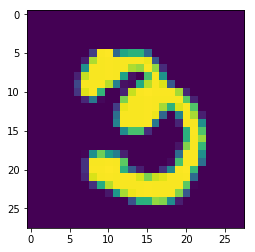

In [26]:
def toImg(arr):
    return arr.values.reshape(-1, 28, 28, 1)

#Imgs
g = toImg(X_train)
g_plt = plt.imshow(g[0][:, :, 0])

In [7]:
model = Sequential()
#Architecture
model.add(Dense(4096, activation = 'relu', input_dim = 784))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.50))

model.add(Dense(2048, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.50))

model.add(Dense(2048, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.50))

model.add(Dense(2048, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.50))

model.add(Dense(2048, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.50))

model.add(Dense(1024, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(1024, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(1024, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(1024, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(k.layers.Dropout(.25))

model.add(Dense(10, activation = 'softmax'))

#Compilation
adam = k.optimizers.Adam()
model.compile(optimizer = adam, loss='categorical_crossentropy', metrics=['accuracy'])

#Training
learning_rate_reduction = ReduceLROnPlateau(monitor='acc', patience=2, verbose=1, factor=0.5, min_lr=0.00001)
model.fit(X_train, Y_train, epochs=15, batch_size=64, callbacks = [learning_rate_reduction])

Epoch 1/15
37800/37800 [==============================] - 202s 5ms/step - loss: 1.6401 - acc: 0.4333
Epoch 2/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.6684 - acc: 0.8085
Epoch 3/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.4725 - acc: 0.8864
Epoch 4/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.4085 - acc: 0.9045
Epoch 5/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.3699 - acc: 0.9140
Epoch 6/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.3467 - acc: 0.9211
Epoch 7/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.3246 - acc: 0.9256
Epoch 8/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.3282 - acc: 0.9273
Epoch 9/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.3274 - acc: 0.9275
Epoch 10/15
37800/37800 [==============================] - 191s 5ms/step - loss: 0.2966 - a

In [ ]:
model.evaluate(X_val, Y_val, verbose = 1)

In [8]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("nn_mnist_datagen.csv",index=False)

In [27]:
#Save Model
# serialize model to JSON
model_json = model.to_json()
with open("nnmodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("nnmodel.h5")
print("Saved model to disk")

Saved model to disk
